In [1]:
import sys
import csv
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame, read_excel
from pandas import pivot_table, crosstab, melt, merge
import seaborn as sb
import numpy as np
import datetime as dt


In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df = pd.read_excel("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\과제물/sunsplots.xlsx")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,관측일자(OBSR_YMD),SRS번호(SRS_NO),숫자(NUM),위치(LOC),캐링턴경도(CARGTN_LOT),면적값(AREA_VALUE),태양흑점모양분류내용(SS_SHP_CL_CN),경도각도거리(LOT_ANGLE_DSTNC),태양흑점수(SS_CNT),자기장유형(MAG_TY),PLAGE숫자(PLAGE_NUM),PLAGE위치(PLAGE_LOC),경도(LOT),반환숫자(GVBK_NUM),위도리턴값(LAT_RETN_VALUE),캐링턴리턴값(CARGTN_RETN_VALUE),생성일시(CRT_DT),관측V일자(OBSR_VYMD)
1,2023-05-31 00:30:00,151,3322,N16W38,224,0010,Bxo,03,05,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,20230531003000
2,2023-05-31 00:30:00,151,3321,S16E66,119,0120,Hsx,02,01,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,20230531003000
3,2023-05-31 00:30:00,151,3320,N09E58,127,0040,Hsx,02,01,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,20230531003000
4,2023-05-31 00:30:00,151,3319,S18W15,201,0070,Dai,08,13,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,20230531003000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,2023-03-01 00:30:00,60,3238,N09E50,258,0070,Hsx,02,01,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01,20230301003000
628,2023-03-01 00:30:00,60,3237,S08W25,332,0000,Axx,02,02,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01,20230301003000
629,2023-03-01 00:30:00,60,3236,S27W44,352,0080,Cso,09,09,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01,20230301003000
630,2023-03-01 00:30:00,60,3234,N25W36,346,0860,Fkc,18,25,Beta-Gamma-Delta,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01,20230301003000


In [4]:
df.dtypes

Unnamed: 0     object
Unnamed: 1     object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
Unnamed: 7     object
Unnamed: 8     object
Unnamed: 9     object
Unnamed: 10    object
Unnamed: 11    object
Unnamed: 12    object
Unnamed: 13    object
Unnamed: 14    object
Unnamed: 15    object
Unnamed: 16    object
Unnamed: 17    object
dtype: object

In [5]:
df = df.rename(columns = df.iloc[0])
df.drop([0], axis = 0, inplace = True)
df

,관측일자(OBSR_YMD),SRS번호(SRS_NO),숫자(NUM),위치(LOC),캐링턴경도(CARGTN_LOT),면적값(AREA_VALUE),태양흑점모양분류내용(SS_SHP_CL_CN),경도각도거리(LOT_ANGLE_DSTNC),태양흑점수(SS_CNT),자기장유형(MAG_TY),PLAGE숫자(PLAGE_NUM),PLAGE위치(PLAGE_LOC),경도(LOT),반환숫자(GVBK_NUM),위도리턴값(LAT_RETN_VALUE),캐링턴리턴값(CARGTN_RETN_VALUE),생성일시(CRT_DT),관측V일자(OBSR_VYMD)
1,2023-05-31 00:30:00,151,3322,N16W38,224,0010,Bxo,03,05,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,20230531003000
2,2023-05-31 00:30:00,151,3321,S16E66,119,0120,Hsx,02,01,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,20230531003000
3,2023-05-31 00:30:00,151,3320,N09E58,127,0040,Hsx,02,01,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,20230531003000
4,2023-05-31 00:30:00,151,3319,S18W15,201,0070,Dai,08,13,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,20230531003000
5,2023-05-31 00:30:00,151,3318,N25W46,232,0110,Dso,05,03,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,20230531003000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,2023-03-01 00:30:00,60,3238,N09E50,258,0070,Hsx,02,01,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01,20230301003000
628,2023-03-01 00:30:00,60,3237,S08W25,332,0000,Axx,02,02,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01,20230301003000
629,2023-03-01 00:30:00,60,3236,S27W44,352,0080,Cso,09,09,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01,20230301003000
630,2023-03-01 00:30:00,60,3234,N25W36,346,0860,Fkc,18,25,Beta-Gamma-Delta,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01,20230301003000


In [6]:
df2 = df.filter(['관측일자(OBSR_YMD)','SRS번호(SRS_NO)', '위치(LOC)',	'면적값(AREA_VALUE)',	'태양흑점모양분류내용(SS_SHP_CL_CN)', '태양흑점수(SS_CNT)', '자기장유형(MAG_TY)'])
df2 = df2.sort_values('관측일자(OBSR_YMD)')
df2

,관측일자(OBSR_YMD),SRS번호(SRS_NO),위치(LOC),면적값(AREA_VALUE),태양흑점모양분류내용(SS_SHP_CL_CN),태양흑점수(SS_CNT),자기장유형(MAG_TY)
631,2023-03-01 00:30:00,60,S23W58,0010,Axx,02,Alpha
626,2023-03-01 00:30:00,60,N30E69,0090,Hsx,01,Alpha
627,2023-03-01 00:30:00,60,N09E50,0070,Hsx,01,Alpha
630,2023-03-01 00:30:00,60,N25W36,0860,Fkc,25,Beta-Gamma-Delta
629,2023-03-01 00:30:00,60,S27W44,0080,Cso,09,Beta
...,...,...,...,...,...,...,...
5,2023-05-31 00:30:00,151,N25W46,0110,Dso,03,Beta
4,2023-05-31 00:30:00,151,S18W15,0070,Dai,13,Beta
3,2023-05-31 00:30:00,151,N09E58,0040,Hsx,01,Alpha
2,2023-05-31 00:30:00,151,S16E66,0120,Hsx,01,Alpha


In [7]:
rdf = df2.rename(columns={'관측일자(OBSR_YMD)' : '관측일자','SRS번호(SRS_NO)' : 'SRS번호', '위치(LOC)': '위치',	'면적값(AREA_VALUE)' : '크기',	'태양흑점모양분류내용(SS_SHP_CL_CN)': '모양' , '태양흑점수(SS_CNT)' : '흑점수',	 '자기장유형(MAG_TY)' : '자기장'})
rdf

,관측일자,SRS번호,위치,크기,모양,흑점수,자기장
631,2023-03-01 00:30:00,60,S23W58,0010,Axx,02,Alpha
626,2023-03-01 00:30:00,60,N30E69,0090,Hsx,01,Alpha
627,2023-03-01 00:30:00,60,N09E50,0070,Hsx,01,Alpha
630,2023-03-01 00:30:00,60,N25W36,0860,Fkc,25,Beta-Gamma-Delta
629,2023-03-01 00:30:00,60,S27W44,0080,Cso,09,Beta
...,...,...,...,...,...,...,...
5,2023-05-31 00:30:00,151,N25W46,0110,Dso,03,Beta
4,2023-05-31 00:30:00,151,S18W15,0070,Dai,13,Beta
3,2023-05-31 00:30:00,151,N09E58,0040,Hsx,01,Alpha
2,2023-05-31 00:30:00,151,S16E66,0120,Hsx,01,Alpha


In [8]:
rdf.dtypes

관측일자     object
SRS번호    object
위치       object
크기       object
모양       object
흑점수      object
자기장      object
dtype: object

In [9]:
rdf['관측일자'] = rdf['관측일자'].astype('str')
rdf['관측일자'] = pd.to_datetime(rdf['관측일자'])
rdf['관측일자'] = rdf['관측일자'].apply(lambda x : dt.datetime.strftime(x, '%y-%m-%d'))
rdf

,관측일자,SRS번호,위치,크기,모양,흑점수,자기장
631,23-03-01,60,S23W58,0010,Axx,02,Alpha
626,23-03-01,60,N30E69,0090,Hsx,01,Alpha
627,23-03-01,60,N09E50,0070,Hsx,01,Alpha
630,23-03-01,60,N25W36,0860,Fkc,25,Beta-Gamma-Delta
629,23-03-01,60,S27W44,0080,Cso,09,Beta
...,...,...,...,...,...,...,...
5,23-05-31,151,N25W46,0110,Dso,03,Beta
4,23-05-31,151,S18W15,0070,Dai,13,Beta
3,23-05-31,151,N09E58,0040,Hsx,01,Alpha
2,23-05-31,151,S16E66,0120,Hsx,01,Alpha


In [10]:
rdf.value_counts()

관측일자      SRS번호  위치      크기    모양   흑점수  자기장             
23-03-01  60     N09E50  0070  Hsx  01   Alpha               1
23-05-03  123    N20W14  0150  Dsi  14   Beta                1
23-05-02  122    S17W62  0120  Cao  06   Beta                1
                 S23W56  0400  Ehc  13   Beta-Gamma-Delta    1
23-05-03  123    N07W74  0010  Axx  02   Alpha               1
                                                            ..
23-03-28  87     N18W40  0090  Dai  09   Beta                1
                 N20W15  0090  Dao  07   Beta                1
                 N22W32  0070  Hax  02   Alpha               1
                 N24W69  0020  Hsx  01   Alpha               1
23-05-31  151    S18W15  0070  Dai  13   Beta                1
Name: count, Length: 631, dtype: int64

In [11]:
rdf['흑점수'] = rdf['흑점수'].astype('int')
rdf.copy()
bf = rdf.filter(['관측일자','흑점수'])
cdf = bf.groupby('관측일자').sum()
cdf = cdf.reset_index()
cdf

,관측일자,흑점수
0,23-03-01,40
1,23-03-02,35
2,23-03-03,28
3,23-03-04,43
4,23-03-05,42
...,...,...
87,23-05-27,57
88,23-05-28,55
89,23-05-29,49
90,23-05-30,53


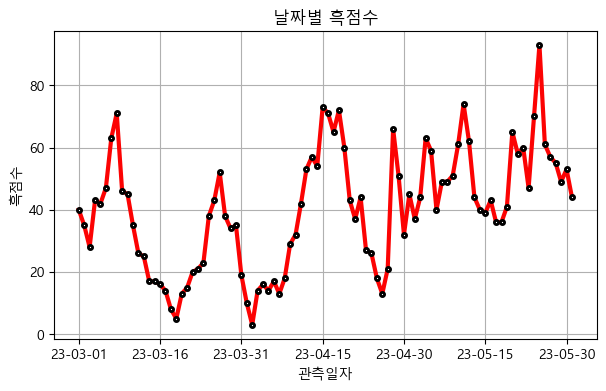

In [12]:
plt.figure()
plt.title('날짜별 흑점수')
plt.plot(cdf['관측일자'], cdf['흑점수'], color="#fc0303", linestyle='-', linewidth=3,
         marker="o", markersize = 3, markerfacecolor = "#ffffff",
         markeredgecolor = "#000000", markeredgewidth=2)

plt.xlabel('관측일자')
plt.ylabel('흑점수')
plt.grid()

total_len = len(cdf['관측일자'])

plt.xticks(np.arange(0, total_len + 1, 15))
plt.show()
plt.close()

In [83]:
sf = pd.read_csv("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\과제물/태양광.csv", encoding = 'cp949')
sf.drop(['거래시간'], axis = 1, inplace = True)
sf

,거래일자,지역,발전량
0,2018-01-01,강원도,13.680
1,2018-01-01,강원도,0.000
2,2018-01-01,강원도,14.400
3,2018-01-01,강원도,0.000
4,2018-01-01,강원도,0.000
...,...,...,...
596083,2021-12-31,충청북도,47668.337
596084,2021-12-31,충청북도,41720.571
596085,2021-12-31,충청북도,23464.794
596086,2021-12-31,충청북도,8098.187


# 2021년도 데이터 산출하기

In [84]:
# 시작일과 종료일 설정

start_date = '2021-01-01'
end_date = '2021-12-31'
# 검색 기간에 따른 데이터 추출
ssf = sf.query("`거래일자` >= @ start_date and `거래일자` <= @end_date")
ssf


,거래일자,지역,발전량
447168,2021-01-01,강원도,1076.659
447169,2021-01-01,강원도,257.927
447170,2021-01-01,강원도,0.720
447171,2021-01-01,강원도,0.000
447172,2021-01-01,강원도,0.000
...,...,...,...
596083,2021-12-31,충청북도,47668.337
596084,2021-12-31,충청북도,41720.571
596085,2021-12-31,충청북도,23464.794
596086,2021-12-31,충청북도,8098.187


In [85]:
sdf = ssf.groupby(['거래일자','지역']).sum()
sdf

발전량 
거래일자       지역               
2021-01-01 강원도   1141609.653
           경기도    573033.694
           경상남도   768190.354
           경상북도   981012.455
           광주시     21928.302
...                      ...
2021-12-31 전라남도  3708362.468
           전라북도  1208194.009
           제주도    621527.670
           충청남도  1740624.960
           충청북도   836706.701

[6205 rows x 1 columns]

In [88]:
sdf2 = sdf.groupby(['지역']).sum()
sdf2 = sdf2.sort_values('지역')
sdf2

,발전량
지역,
강원도,5.617457e+08
경기도,3.062760e+08
경상남도,3.884844e+08
경상북도,6.723856e+08
광주시,6.968133e+07
대구시,5.558218e+07
대전시,1.459963e+07
부산시,9.296411e+07
서울시,1.698200e+07


# 에너지 소비 전력 데이터 가져오기

In [89]:
ef = read_excel("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\과제물/지역별에너지원소비실적.xlsx")
ef

d:\python\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,지역별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
0,지역별(1),업체수 (개),합계 (toe),연료 (toe),연료 (toe),연료 (toe),연료 (toe),전력 (MWh)
1,지역별(1),소계,소계,소계,석탄류,석유류,가스류,소계
2,계,408,2840652,2424607,17,1534999,889591,4837742
3,서울,81,1021857,931089,-,711914,219175,1055434
4,부산,58,340142,310091,-,226096,83995,349432
5,대구,22,77787,62631,-,20125,42506,176235
6,인천,32,119384,95664,-,36564,59100,275812
7,광주,9,30109,28226,-,5223,23003,21885
8,대전,14,333511,111434,-,83289,28146,2582284
9,울산,11,43821,42530,-,14691,27839,15011
